In [11]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
df = pd.read_csv('saveecobot_17113.csv')
df

,device_id,phenomenon,value,logged_at,value_text
0,17113,pm1,1.626000e+01,2021-03-28 00:00:21,NaN
1,17113,pm25,2.712000e+01,2021-03-28 00:00:21,NaN
2,17113,pm10,4.213000e+01,2021-03-28 00:00:21,NaN
3,17113,pressure_pa,1.024480e+06,2021-03-28 00:00:21,NaN
4,17113,humidity,6.526000e+01,2021-03-28 00:00:21,NaN
...,...,...,...,...,...
808167,17113,temperature,2.051000e+01,2023-09-05 21:15:09,NaN
808168,17113,no2_ug,5.519000e+01,2023-09-05 21:15:09,NaN
808169,17113,o3_ug,6.464000e+01,2023-09-05 21:15:09,NaN
808170,17113,no2_ppb,2.862290e+01,2023-09-05 21:15:09,NaN


In [13]:
df = df.drop("value_text", axis=1)
df

,device_id,phenomenon,value,logged_at
0,17113,pm1,1.626000e+01,2021-03-28 00:00:21
1,17113,pm25,2.712000e+01,2021-03-28 00:00:21
2,17113,pm10,4.213000e+01,2021-03-28 00:00:21
3,17113,pressure_pa,1.024480e+06,2021-03-28 00:00:21
4,17113,humidity,6.526000e+01,2021-03-28 00:00:21
...,...,...,...,...
808167,17113,temperature,2.051000e+01,2023-09-05 21:15:09
808168,17113,no2_ug,5.519000e+01,2023-09-05 21:15:09
808169,17113,o3_ug,6.464000e+01,2023-09-05 21:15:09
808170,17113,no2_ppb,2.862290e+01,2023-09-05 21:15:09


In [14]:
for column in df.columns:
    unique_count = df[column].nunique()
    unique_values = df[column].unique()
    print(f"Column '{column}' has {unique_count} unique values:")
    print(unique_values)

Column 'device_id' has 1 unique values:
[17113]
Column 'phenomenon' has 10 unique values:
['pm1' 'pm25' 'pm10' 'pressure_pa' 'humidity' 'temperature' 'no2_ug'
 'o3_ug' 'no2_ppb' 'o3_ppb']
Column 'value' has 161931 unique values:
[16.26   27.12   42.13   ... 35.0414 28.6229 32.1341]
Column 'logged_at' has 80813 unique values:
['2021-03-28 00:00:21' '2021-03-28 00:04:29' '2021-03-28 00:22:04' ...
 '2023-09-05 20:45:08' '2023-09-05 21:00:11' '2023-09-05 21:15:09']


In [15]:
df_pm25 = df[df["phenomenon"].isin(["pm25"])]
df_pm25

,device_id,phenomenon,value,logged_at
1,17113,pm25,27.12,2021-03-28 00:00:21
11,17113,pm25,26.98,2021-03-28 00:04:29
21,17113,pm25,26.93,2021-03-28 00:22:04
31,17113,pm25,26.93,2021-03-28 00:23:03
41,17113,pm25,27.93,2021-03-28 00:43:48
...,...,...,...,...
808123,17113,pm25,3.87,2023-09-05 20:15:09
808133,17113,pm25,4.08,2023-09-05 20:30:10
808143,17113,pm25,4.35,2023-09-05 20:45:08
808153,17113,pm25,4.54,2023-09-05 21:00:11


In [16]:
df_pm10 = df[df["phenomenon"].isin(["pm10"])]
df_pm10

,device_id,phenomenon,value,logged_at
2,17113,pm10,42.13,2021-03-28 00:00:21
12,17113,pm10,41.92,2021-03-28 00:04:29
22,17113,pm10,41.84,2021-03-28 00:22:04
32,17113,pm10,41.84,2021-03-28 00:23:03
42,17113,pm10,43.38,2021-03-28 00:43:48
...,...,...,...,...
808124,17113,pm10,5.77,2023-09-05 20:15:09
808134,17113,pm10,6.12,2023-09-05 20:30:10
808144,17113,pm10,6.50,2023-09-05 20:45:08
808154,17113,pm10,6.76,2023-09-05 21:00:11


In [17]:
df_temperature = df[df["phenomenon"].isin(["temperature"])]
df_temperature

,device_id,phenomenon,value,logged_at
5,17113,temperature,8.00,2021-03-28 00:00:21
15,17113,temperature,7.96,2021-03-28 00:04:29
25,17113,temperature,7.78,2021-03-28 00:22:04
35,17113,temperature,7.78,2021-03-28 00:23:03
45,17113,temperature,7.58,2021-03-28 00:43:48
...,...,...,...,...
808127,17113,temperature,22.39,2023-09-05 20:15:09
808137,17113,temperature,21.71,2023-09-05 20:30:10
808147,17113,temperature,21.30,2023-09-05 20:45:08
808157,17113,temperature,20.90,2023-09-05 21:00:11


In [18]:
df_no2_ug = df[df["phenomenon"].isin(["no2_ug"])]
df_pressure_pa = df[df["phenomenon"].isin(["pressure_pa"])]
df_humidity = df[df["phenomenon"].isin(["humidity"])]
df_o3_ug = df[df["phenomenon"].isin(["o3_ug"])]
df_no2_ug

,device_id,phenomenon,value,logged_at
6,17113,no2_ug,119.35,2021-03-28 00:00:21
16,17113,no2_ug,119.28,2021-03-28 00:04:29
26,17113,no2_ug,121.92,2021-03-28 00:22:04
36,17113,no2_ug,121.92,2021-03-28 00:23:03
46,17113,no2_ug,129.63,2021-03-28 00:43:48
...,...,...,...,...
808128,17113,no2_ug,58.00,2023-09-05 20:15:09
808138,17113,no2_ug,57.05,2023-09-05 20:30:10
808148,17113,no2_ug,56.22,2023-09-05 20:45:08
808158,17113,no2_ug,55.53,2023-09-05 21:00:11


In [19]:
df[df["phenomenon"] == 'no2_ug']

,device_id,phenomenon,value,logged_at
6,17113,no2_ug,119.35,2021-03-28 00:00:21
16,17113,no2_ug,119.28,2021-03-28 00:04:29
26,17113,no2_ug,121.92,2021-03-28 00:22:04
36,17113,no2_ug,121.92,2021-03-28 00:23:03
46,17113,no2_ug,129.63,2021-03-28 00:43:48
...,...,...,...,...
808128,17113,no2_ug,58.00,2023-09-05 20:15:09
808138,17113,no2_ug,57.05,2023-09-05 20:30:10
808148,17113,no2_ug,56.22,2023-09-05 20:45:08
808158,17113,no2_ug,55.53,2023-09-05 21:00:11


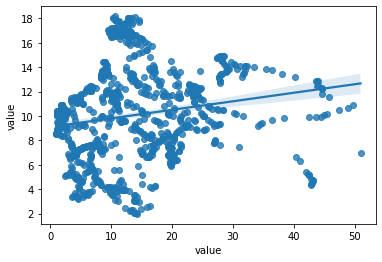

In [20]:
xpoints = df_pm25['value'].iloc[:1000]
ypoints = df_temperature['value'].iloc[:1000]

sns.regplot(x = xpoints , y = ypoints)

plt.show()

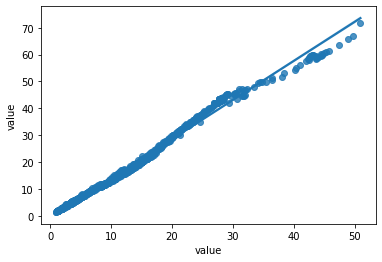

In [21]:
xpoints = df_pm25['value'].iloc[:1000]
ypoints = df_pm10['value'].iloc[:1000]

sns.regplot(x = xpoints , y = ypoints)

plt.show()

In [22]:
df_pm25['logged_at'] = pd.to_datetime(df_pm25['logged_at'])
df_pm25['hour'] = df_pm25['logged_at'].dt.hour
df_pm25


C:\Users\valer\AppData\Local\Temp\ipykernel_9464\2203954535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25['logged_at'] = pd.to_datetime(df_pm25['logged_at'])
C:\Users\valer\AppData\Local\Temp\ipykernel_9464\2203954535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25['hour'] = df_pm25['logged_at'].dt.hour


,device_id,phenomenon,value,logged_at,hour
1,17113,pm25,27.12,2021-03-28 00:00:21,0
11,17113,pm25,26.98,2021-03-28 00:04:29,0
21,17113,pm25,26.93,2021-03-28 00:22:04,0
31,17113,pm25,26.93,2021-03-28 00:23:03,0
41,17113,pm25,27.93,2021-03-28 00:43:48,0
...,...,...,...,...,...
808123,17113,pm25,3.87,2023-09-05 20:15:09,20
808133,17113,pm25,4.08,2023-09-05 20:30:10,20
808143,17113,pm25,4.35,2023-09-05 20:45:08,20
808153,17113,pm25,4.54,2023-09-05 21:00:11,21


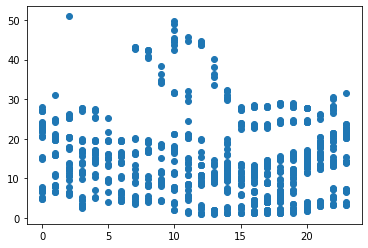

In [23]:
ypoints = df_pm25['value'].iloc[:1000]
xpoints = df_pm25['hour'].iloc[:1000]

plt.plot(xpoints, ypoints, 'o')

plt.show()

In [24]:
df_morning = df_pm25.query("hour> 5 & hour < 11")  
df_night = df_pm25.query("hour> 17 & hour < 23")  
df_morning

,device_id,phenomenon,value,logged_at,hour
1871,17113,pm25,42.73,2021-04-12 07:13:15,7
1881,17113,pm25,42.88,2021-04-12 07:17:08,7
1891,17113,pm25,42.92,2021-04-12 07:22:45,7
1901,17113,pm25,43.09,2021-04-12 07:37:22,7
1911,17113,pm25,43.11,2021-04-12 07:42:37,7
...,...,...,...,...,...
807703,17113,pm25,7.09,2023-09-05 09:45:08,9
807713,17113,pm25,7.19,2023-09-05 10:00:11,10
807723,17113,pm25,6.68,2023-09-05 10:15:09,10
807733,17113,pm25,6.27,2023-09-05 10:30:09,10


In [25]:
feature_df = df.groupby(['phenomenon', 'logged_at'], as_index=False).aggregate('mean')
phenomenon_time_df = feature_df.pivot_table(index=['logged_at'], columns='phenomenon', values=['value',])
phenomenon_time_df.reset_index(inplace=True)
phenomenon_time_df.columns = [col[1] if col[1]!='' else col[0] for col in phenomenon_time_df.columns.values]
print('Columns:  ', phenomenon_time_df.columns)
phenomenon_time_df['logged_at'] = pd.to_datetime(phenomenon_time_df['logged_at'])
phenomenon_time_df['hour'] = phenomenon_time_df['logged_at'].dt.hour
phenomenon_time_df['humidity'] = pd.to_numeric(phenomenon_time_df['humidity'], errors='coerce')
phenomenon_time_df['no2_ppb'] = pd.to_numeric(phenomenon_time_df['no2_ppb'], errors='coerce')
phenomenon_time_df['o3_ppb'] = pd.to_numeric(phenomenon_time_df['o3_ppb'], errors='coerce')
phenomenon_time_df['pm1'] = pd.to_numeric(phenomenon_time_df['pm1'], errors='coerce')
phenomenon_time_df['pm10'] = pd.to_numeric(phenomenon_time_df['pm10'], errors='coerce')
phenomenon_time_df['pm25'] = pd.to_numeric(phenomenon_time_df['pm25'], errors='coerce')
phenomenon_time_df['pressure_pa'] = pd.to_numeric(phenomenon_time_df['pressure_pa'], errors='coerce')
phenomenon_time_df['temperature'] = pd.to_numeric(phenomenon_time_df['temperature'], errors='coerce')
phenomenon_time_df = phenomenon_time_df.dropna()
phenomenon_time_df







Columns:   Index(['logged_at', 'humidity', 'no2_ppb', 'no2_ug', 'o3_ppb', 'o3_ug', 'pm1',
       'pm10', 'pm25', 'pressure_pa', 'temperature'],
      dtype='object')


,logged_at,humidity,no2_ppb,no2_ug,o3_ppb,o3_ug,pm1,pm10,pm25,pressure_pa,temperature,hour
0,2021-03-28 00:00:21,65.26,59.1382,119.35,0.3182,0.67,16.26,42.13,27.12,1024480.0,8.00,0
1,2021-03-28 00:04:29,65.56,59.0939,119.28,0.1900,0.40,16.17,41.92,26.98,1024500.0,7.96,0
2,2021-03-28 00:22:04,66.82,60.3561,121.92,0.0000,0.00,16.07,41.84,26.93,1024620.0,7.78,0
3,2021-03-28 00:23:03,66.82,60.3561,121.92,0.0000,0.00,16.07,41.84,26.93,1024620.0,7.78,0
4,2021-03-28 00:43:48,68.19,64.1190,129.63,0.0000,0.00,16.72,43.38,27.93,1024750.0,7.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80808,2023-09-05 20:15:09,58.94,30.2809,58.00,43.8435,87.61,2.42,5.77,3.87,1022110.0,22.39,20
80809,2023-09-05 20:30:10,61.00,29.7143,57.05,40.5743,81.27,2.54,6.12,4.08,1022180.0,21.71,20
80810,2023-09-05 20:45:08,62.50,29.2396,56.22,37.8085,75.84,2.73,6.50,4.35,1022240.0,21.30,20
80811,2023-09-05 21:00:11,64.00,28.8395,55.53,35.0414,70.39,2.88,6.76,4.54,1022310.0,20.90,21


In [41]:
corr_matrix = phenomenon_time_df.corr().abs()
corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False)
      )[:16]
print(corr)
corr_items = list(corr.index)


no2_ppb   no2_ug         0.999260
o3_ppb    o3_ug          0.998193
pm10      pm25           0.979643
pm1       pm25           0.951978
          pm10           0.917278
no2_ppb   temperature    0.673992
no2_ug    temperature    0.658271
humidity  temperature    0.531346
o3_ppb    temperature    0.523678
o3_ug     temperature    0.478852
humidity  o3_ppb         0.442532
          o3_ug          0.428456
          no2_ppb        0.394881
          no2_ug         0.386472
          hour           0.360547
pm25      temperature    0.321729
dtype: float64


C:\Users\valer\AppData\Local\Temp\ipykernel_9464\3817428167.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = phenomenon_time_df.corr().abs()


In [27]:
X = pd.DataFrame(phenomenon_time_df['pm25'])
y = pd.DataFrame(phenomenon_time_df['pm10'])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)



#print(f"train samples: {len(train)},  test samples {len(test)}")

#train.dropna()

In [28]:



regressor = LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.intercept_, regressor.coef_)

    
   

[0.34775215] [[1.32917539]]


<AxesSubplot:xlabel='pm25', ylabel='pm10'>

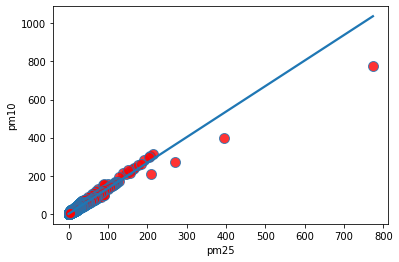

In [29]:
sns.regplot(x='pm25', y='pm10', data=phenomenon_time_df, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

In [30]:
y_pred = regressor.predict(X_test)
y_pred = y_pred.flatten()
y_test['pm10_pred'] = y_pred
y_test


,pm10,pm10_pred
79621,6.32,5.970164
24283,39.51,37.989999
14200,18.38,19.301793
5418,9.75,10.542527
49304,33.64,30.280782
...,...,...
75188,9.10,8.934225
65661,24.40,27.542681
37451,6.51,6.156249
2834,22.49,22.292438


<AxesSubplot:xlabel='pm10', ylabel='pm10_pred'>

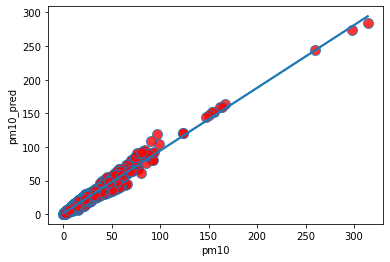

In [31]:
sns.regplot(x='pm10', y='pm10_pred', data=y_test, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

In [32]:
print(f"r2_score  ", r2_score(X_test, y_pred))
print(f"RMSE  ", mean_squared_error(X_test, y_pred, squared=True), '\n\n')

r2_score   0.645043558185799
RMSE   30.136444508374844 




In [33]:
X = pd.DataFrame(phenomenon_time_df['pm25'])
y = pd.DataFrame(phenomenon_time_df['hour'])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [34]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.intercept_, regressor.coef_)

[12.39889818] [[-0.07113784]]


<AxesSubplot:xlabel='hour', ylabel='pm25'>

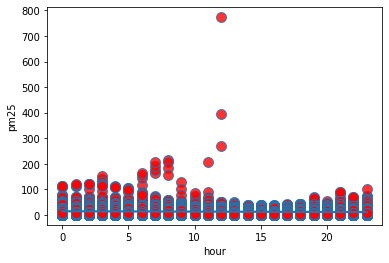

In [35]:
sns.regplot(x='hour', y='pm25', data=phenomenon_time_df, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

In [36]:
y_pred = regressor.predict(X_test)
y_pred = y_pred.flatten()
y_test['pm25_pred'] = y_pred
y_test['pm25'] = X_test
y_test

,hour,pm25_pred,pm25
79621,20,12.097985,4.23
24283,22,10.384275,28.32
14200,21,11.384473,14.26
5418,15,11.853271,7.67
49304,21,10.796874,22.52
...,...,...,...
75188,15,11.939348,6.46
65661,22,10.943418,20.46
37451,9,12.088026,4.37
2834,8,11.224412,16.51


In [37]:
print(f"r2_score  ", r2_score(X_test, y_pred))
print(f"RMSE  ", mean_squared_error(X_test, y_pred, squared=True), '\n\n')

r2_score   -0.16908209892916437
RMSE   99.25718665659555 


